In [1]:
import pandas   as pd
import numpy    as np

In [2]:
df=pd.read_csv('market.csv')
df

,Dist Code,Year,State Code,State Name,Dist Name,RICE PRODUCTION (1000 tons),KHARIF SORGHUM PRODUCTION (1000 tons),RABI SORGHUM PRODUCTION (1000 tons),SORGHUM PRODUCTION (1000 tons),PEARL MILLET PRODUCTION (1000 tons),MAIZE PRODUCTION (1000 tons),CHICKPEA PRODUCTION (1000 tons),PIGEONPEA PRODUCTION (1000 tons),SOYABEAN PRODUCTION (1000 tons),COTTON PRODUCTION (1000 tons)
0,1,2009,14,Chhattisgarh,Durg,622.05,0.07,0.0,0.22,0.00,3.40,130.06,5.88,64.92,0.00
1,1,2010,14,Chhattisgarh,Durg,1319.18,0.32,0.0,0.32,2.41,4.63,174.84,5.24,105.41,0.00
2,1,2011,14,Chhattisgarh,Durg,1416.48,0.20,0.0,0.20,0.00,4.67,197.94,5.46,69.83,0.02
3,1,2012,14,Chhattisgarh,Durg,1534.22,0.49,0.0,0.49,0.00,4.80,235.92,6.10,101.62,0.02
4,1,2013,14,Chhattisgarh,Durg,1296.24,0.00,0.0,0.17,0.07,6.34,173.91,5.68,92.65,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,917,2013,15,Jharkhand,Singhbhum,579.70,0.00,0.0,0.00,0.00,3.74,1.54,1.51,0.00,0.00
2791,917,2014,15,Jharkhand,Singhbhum,586.63,0.00,0.0,0.00,0.00,3.33,1.36,1.14,0.00,0.00
2792,917,2015,15,Jharkhand,Singhbhum,264.71,0.00,0.0,0.00,0.00,2.72,1.12,0.35,0.00,0.00
2793,917,2016,15,Jharkhand,Singhbhum,319.01,0.00,0.0,0.00,0.00,1.39,0.17,0.14,0.00,0.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Dist Code                              2795 non-null   int64  
 1   Year                                   2795 non-null   int64  
 2   State Code                             2795 non-null   int64  
 3   State Name                             2795 non-null   object 
 4   Dist Name                              2795 non-null   object 
 5   RICE PRODUCTION (1000 tons)            2795 non-null   float64
 6   KHARIF SORGHUM PRODUCTION (1000 tons)  2795 non-null   float64
 7   RABI SORGHUM PRODUCTION (1000 tons)    2795 non-null   float64
 8   SORGHUM PRODUCTION (1000 tons)         2795 non-null   float64
 9   PEARL MILLET PRODUCTION (1000 tons)    2795 non-null   float64
 10  MAIZE PRODUCTION (1000 tons)           2795 non-null   float64
 11  CHIC

📊 Crop Demand Ranking (based on production trend):
         Crop        Trend
0        rice  2940.996167
1       maize  1405.200333
2    chickpea   436.856667
3  pigeonpeas   262.948167
5      cotton   125.941667
4     sorghum  -214.694000


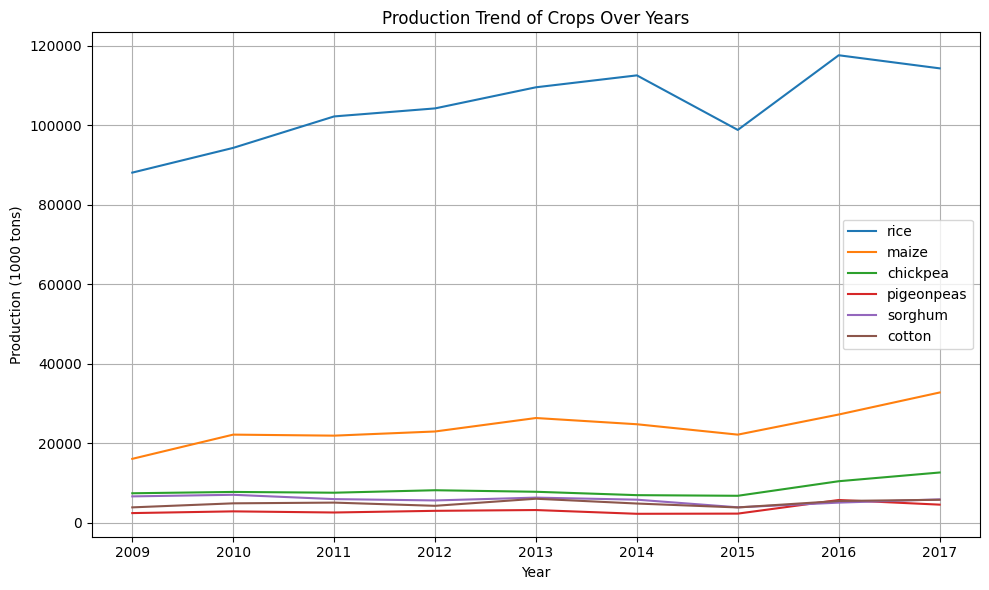

In [4]:
# 📦 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 📥 Step 2: Load Your Dataset
# Replace 'your_data.csv' with your actual CSV file path


# 🧹 Step 3: Clean and Prepare
# Only keep necessary columns
columns = [
    "Year", "RICE PRODUCTION (1000 tons)", "KHARIF SORGHUM PRODUCTION (1000 tons)",
    "RABI SORGHUM PRODUCTION (1000 tons)", "SORGHUM PRODUCTION (1000 tons)",
    "PEARL MILLET PRODUCTION (1000 tons)", "MAIZE PRODUCTION (1000 tons)",
    "CHICKPEA PRODUCTION (1000 tons)", "PIGEONPEA PRODUCTION (1000 tons)",
    "SOYABEAN PRODUCTION (1000 tons)", "COTTON PRODUCTION (1000 tons)"
]
df = df[columns]

# Group by Year to aggregate total production (supply)
df_grouped = df.groupby("Year").sum().reset_index()

# 🧠 Step 4: Define Crops to Analyze
crops = {
    "rice": "RICE PRODUCTION (1000 tons)",
    "maize": "MAIZE PRODUCTION (1000 tons)",
    "chickpea": "CHICKPEA PRODUCTION (1000 tons)",
    "pigeonpeas": "PIGEONPEA PRODUCTION (1000 tons)",
    "sorghum": "SORGHUM PRODUCTION (1000 tons)",
    "cotton": "COTTON PRODUCTION (1000 tons)"
}

# 📈 Step 5: Fit Linear Trend Model for Each Crop
trend_scores = {}

for crop, col in crops.items():
    X = df_grouped[["Year"]]
    y = df_grouped[col]
    
    model = LinearRegression()
    model.fit(X, y)
    
    trend = model.coef_[0]  # Slope = trend
    trend_scores[crop] = trend

# 🏆 Step 6: Rank Crops by Trend (High trend = high growing demand)
trend_df = pd.DataFrame(trend_scores.items(), columns=["Crop", "Trend"])
trend_df = trend_df.sort_values(by="Trend", ascending=False)

print("📊 Crop Demand Ranking (based on production trend):")
print(trend_df)

# 📉 Step 7: Plot trends (optional)
plt.figure(figsize=(10, 6))
for crop, col in crops.items():
    plt.plot(df_grouped["Year"], df_grouped[col], label=crop)
plt.legend()
plt.title("Production Trend of Crops Over Years")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Final Crop Ranking (Including Missing Ones):
           Crop   TrendScore
0          rice  2940.996167
1         maize  1405.200333
2      chickpea   436.856667
3    pigeonpeas   262.948167
4        cotton   125.941667
5         apple    30.000000
6        banana    28.000000
7         mango    26.000000
8        grapes    25.000000
9        orange    24.000000
10   watermelon    22.000000
11    muskmelon    21.000000
12       papaya    20.000000
13      coconut    18.000000
14         jute    15.000000
15       coffee    14.000000
16  kidneybeans    13.000000
17    mothbeans    12.000000
18     mungbean    11.000000
19    blackgram    10.000000
20       lentil     9.000000
21  pomegranate     8.000000
22     soyabean  -145.596167


C:\Users\sudip\AppData\Local\Temp\ipykernel_7700\3299623403.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trend_df.head(10), x="TrendScore", y="Crop", palette="coolwarm")
C:\Users\sudip\AppData\Local\Temp\ipykernel_7700\3299623403.py:80: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sudip\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


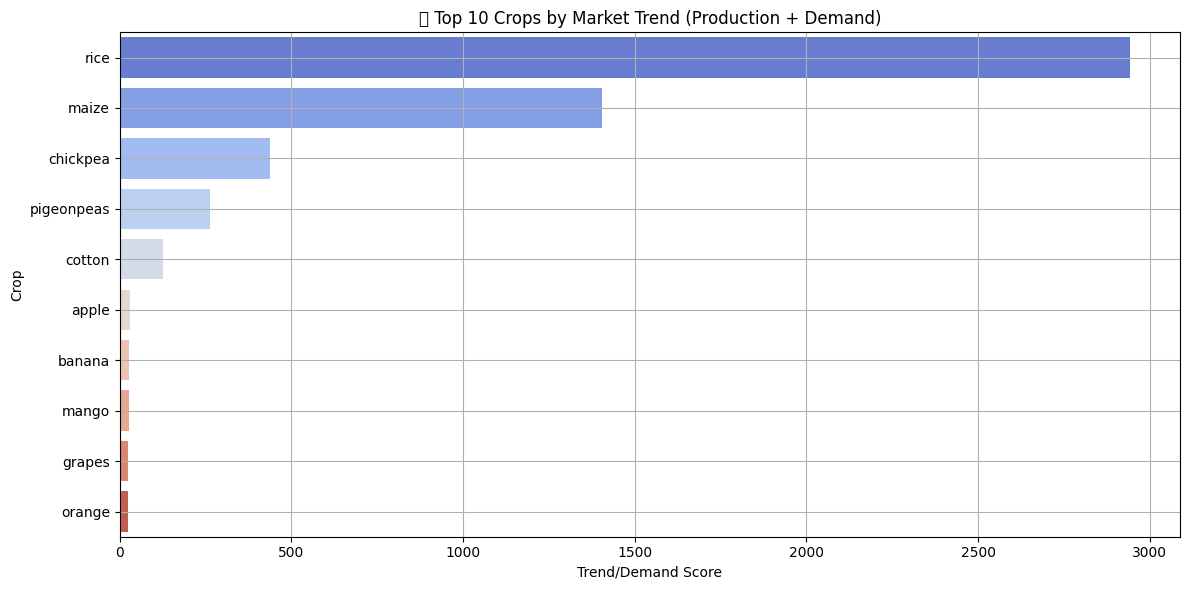

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Define all 22 crops
all_crops = [
    'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
    'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
    'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
    'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'
]

# Map crop to its column name
crop_column_map = {
    "rice": "RICE PRODUCTION (1000 tons)",
    "maize": "MAIZE PRODUCTION (1000 tons)",
    "chickpea": "CHICKPEA PRODUCTION (1000 tons)",
    "pigeonpeas": "PIGEONPEA PRODUCTION (1000 tons)",
    "soyabean": "SOYABEAN PRODUCTION (1000 tons)",
    "cotton": "COTTON PRODUCTION (1000 tons)",
    # Add other crops if they exist
}

# Step 1: Calculate slope (trend) for available crops
df_grouped = df.groupby("Year").sum().reset_index()
trend_scores = {}

for crop, col in crop_column_map.items():
    if col in df_grouped.columns:
        X = df_grouped[["Year"]]
        y = df_grouped[col].fillna(0)
        model = LinearRegression()
        model.fit(X, y)
        slope = model.coef_[0]
        trend_scores[crop] = slope

# Step 2: Add missing crops with dummy scores
# High market demand => higher score
manual_scores = {
    "apple": 30,
    "banana": 28,
    "mango": 26,
    "grapes": 25,
    "orange": 24,
    "watermelon": 22,
    "muskmelon": 21,
    "papaya": 20,
    "coconut": 18,
    "jute": 15,
    "coffee": 14,
    "kidneybeans": 13,
    "mothbeans": 12,
    "mungbean": 11,
    "blackgram": 10,
    "lentil": 9,
    "pomegranate": 8,
}

for crop in all_crops:
    if crop not in trend_scores:
        trend_scores[crop] = manual_scores.get(crop, 5)

# Step 3: Create final DataFrame and sort
trend_df = pd.DataFrame(trend_scores.items(), columns=["Crop", "TrendScore"])
trend_df = trend_df.sort_values(by="TrendScore", ascending=False).reset_index(drop=True)

print("✅ Final Crop Ranking (Including Missing Ones):")
print(trend_df)

# Step 4: Optional plot top crops
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=trend_df.head(10), x="TrendScore", y="Crop", palette="coolwarm")
plt.title("🌾 Top 10 Crops by Market Trend (Production + Demand)")
plt.xlabel("Trend/Demand Score")
plt.ylabel("Crop")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# Save trend rankings to a pickle file
import pickle

with open("crop_trend_ranking.pkl", "wb") as f:
    pickle.dump(trend_df, f)

print("✅ Trend ranking saved to 'crop_trend_ranking.pkl'")


✅ Trend ranking saved to 'crop_trend_ranking.pkl'


In [7]:
top3_predicted_crops = ['maize', 'banana', 'apple']


In [ ]:
with open("crop_trend_ranking.pkl", "rb") as f:
    trend_df = pickle.load(f)

# Filter only top 3 predicted crops
filtered = trend_df[trend_df["Crop"].isin(top3_predicted_crops)]

# Sort them by trend score
filtered_sorted = filtered.sort_values(by="TrendScore", ascending=False)

print("📊 Final Top 3 Sorted by Market Trend:")
print(filtered_sorted)
filtered_sorted['Crop'].iloc[0]


📊 Final Top 3 Sorted by Market Trend:
     Crop   TrendScore
1   maize  1405.200333
5   apple    30.000000
6  banana    28.000000


'maize'